<a href="https://colab.research.google.com/github/Pramodini06/assignment/blob/main/project%20spam%20email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('/content/email_classification_dataset.csv')

In [3]:
data.head(5)

,id,email,label
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham
3,3244,From: info@customerservice.co\nSubject: Team S...,ham
4,2844,From: info@customerservice.co\nSubject: Team S...,ham


In [5]:
data['label'].value_counts()


,count
label,
ham,8500
spam,1500


In [6]:
data.describe()

,id
count,10000.00000
mean,5000.50000
std,2886.89568
min,1.00000
25%,2500.75000
50%,5000.50000
75%,7500.25000
max,10000.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   email   10000 non-null  object
 2   label   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [8]:
data.isnull().sum()

,0
id,0
email,0
label,0


Text(0.5, 0, 'email')

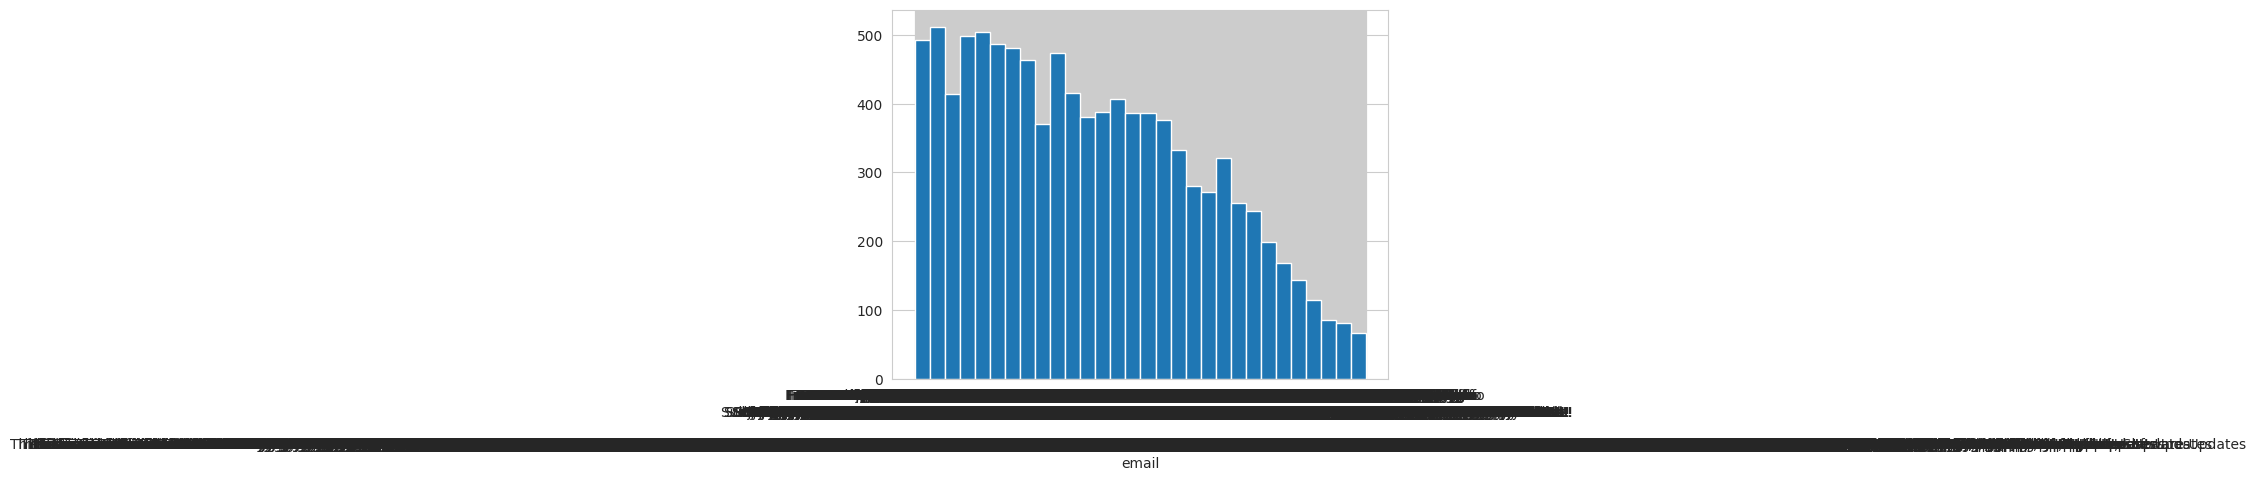

In [9]:
sns.set_style('whitegrid')
data['email'].hist(bins=30)
plt.xlabel('email')

In [11]:
X = data[['id', 'email']]
y = data['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
data.shape

(10000, 3)

In [14]:
X_train.shape,X_test.shape

((8000, 2), (2000, 2))

In [15]:
y_train.shape,y_test.shape

((8000,), (2000,))

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- Assuming your data is loaded into a Pandas DataFrame 'df' ---
# Example: df = pd.read_csv('your_dataset.csv')
# Example: Make sure you have a column with email text and a target label column

# Identify your features (X) and target (y)
# Replace 'email_content_column' with the actual name of your column containing email text
# Replace 'target_column' with the actual name of your target variable column (e.g., 'spam_ham', 'category')
X = data[['id', 'email']]
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TfidfVectorizer on the training text data
# This converts text into numerical TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features based on your dataset and needs
X_train_vectorized = vectorizer.fit_transform(X_train['email']) # Pass only the 'email' column
X_test_vectorized = vectorizer.transform(X_test['email']) # Transform test data using the fitted vectorizer, passing only the 'email' column

# Initialize and train the Logistic Regression model with the vectorized numerical data
logistic_model = LogisticRegression(max_iter=1000) # Increase max_iter if convergence warnings occur
logistic_model.fit(X_train_vectorized, y_train)

# Make predictions on the vectorized test data
y_pred = logistic_model.predict(X_test_vectorized)

# Evaluate the model (optional, but good practice)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


In [26]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_vectorized,y_train)

LogisticRegression(max_iter=1000)

In [28]:
predictions = logistic_model.predict(X_test_vectorized)

In [29]:
predictions

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [31]:
logistic_model.score(X_test_vectorized,y_test)

1.0

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1682
        spam       1.00      1.00      1.00       318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



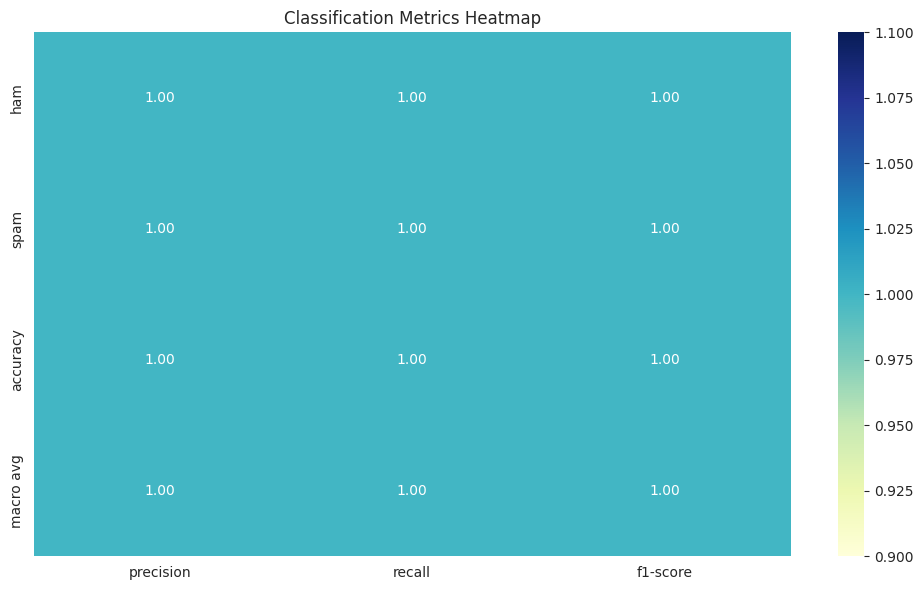

In [33]:
report = classification_report(y_test, predictions, output_dict=True)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Metrics Heatmap')
plt.tight_layout()
plt.show()